# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [33]:
import pandas as pd

In [34]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [35]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [36]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [37]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [38]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [39]:
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business.head()

In [40]:
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people.head()

In [41]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [42]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [43]:
# df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [44]:
# df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [45]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07


In [51]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,비율1
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874,0.003939
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605,0.334779
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197,-0.560349
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742,-0.542806
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686,-0.527274
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692,-0.700851
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831,-0.670886
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281,0.380899
이동인구(합),0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787,-0.060056
총 이동 시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128,-0.222273


In [46]:
# (예시1) 정류장 수와 승차 총 승객수는 관계가 있다.

# H0 : 정류장 수와 승차 총 승객수는 연관이 없다.

# H1 : 정류장 수와 승차 총 승객수는 연관이 있다.

spst.pearsonr(df['정류장수'],df['승차총승객수'])

# 강한 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 정류장수와 승차총승객수는 상관관계가 있다?


(0.5666813370974585, 0.003141977397117322)

In [50]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1'])

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,1.163090e+07,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.437297,6543820,2.918250e+07,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,0.638150
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.735699,94.938240,6234190,2.299774e+07,0.735588
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,0.770887
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,22.411314,46.134844,4952990,1.019598e+07,0.777693
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,23.209394,49.140477,4383860,9.281801e+06,0.795676
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.745571,61.736901,5525180,1.568630e+07,0.810122


In [52]:
# (예시2) 노선 수와 총 이동시간은 관계가 있다.

# H0 : 노선 수와 총 이동시간은 연관이 없다.

# H1 : 노선 수와 총 이동시간은 연관이 있다.

spst.pearsonr(df['노선수'],df['총 이동 시간'])

# 중간 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 노선수와 총 이동 시간은 상관관계가 있다?

(0.3605000532735534, 0.07667781622760951)

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

    ? 정해진게 없나요? - 네 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다


    ? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다


    ? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (조당 최소 3개) 
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

* 가설 2 :
    - 총 이동인구와 하차총승객수는 관계가 있을 것이다. 관계가 있다면, 자치구 유입 시 이동수단으로서 버스의 수요를 알 수 있다.  
    - 버스 수요가 충분하다면(하차총승객수가 많다면) 해당 자치구는 그 만큼의 버스인프라(정류장, 노선)를 갖추고 있을 것이다.

* 가설 3

## 2.단변량 분석 
(조별로 3개 정도의 변수만 진행해주세요)

+ 변수의 의미  

+ 숫자? 범주?

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용 정리  

+ 추가 분석해볼 사항 도출

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬에서 사용하신다면 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# AIDU에서 사용하신다면 나눔 고딕

# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

# scipy
import scipy.stats as spst

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


### 1)

### 2)

## Seoul_Moving

In [2]:
seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')
seoul_moving.replace("*","1.5", inplace= True)
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})
seoul_moving = seoul_moving[(seoul_moving["출발 시군구 코드"] < 20000) & (seoul_moving["도착 시군구 코드"] < 20000)]

index = seoul_moving[seoul_moving['도착시간'] <=4].index
seoul_moving.drop(index, inplace=True)
seoul_moving.reset_index(drop=True, inplace=True)

df_time_mean = seoul_moving.groupby(by=['도착 시군구 코드', '요일'], as_index=False)['평균 이동 시간(분)'].mean()
df_pop_sum = seoul_moving.groupby(by=['도착 시군구 코드', '요일'], as_index=False)['이동인구(합)'].sum()
df_pop_sum.rename(columns={'이동인구(합)':'총 이동인구'},inplace=True)

df_seoul_moving = pd.merge(df_time_mean,df_pop_sum,how='inner', on=['도착 시군구 코드', '요일'])
df_seoul_moving.to_csv("df_seoul_moving_jong.csv", index = False)

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Seoul_Bus_Station

In [4]:
bus_station = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")
bus_station['자치구'] = bus_station["버스정류장ARS번호"].str.slice(start=0, stop=2)
bus_station['자치구'] = bus_station['자치구'].map({'01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

bus_station = bus_station.dropna()
bus_station = bus_station.astype({"버스정류장ARS번호":'int'})
bus_station_count = bus_station.groupby("자치구")["버스정류장ARS번호"].nunique()
only_seoul = pd.read_csv('1.1 bus_station.csv', sep=",", encoding = "UTF-8")
only_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'}, inplace=True)
df = pd.merge(only_seoul,bus_station,how='inner', on='버스정류장ARS번호')

seoul_bus_station_ARS = df.groupby(by=["자치구"], as_index=False)["버스정류장ARS번호"].nunique()
seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["노선번호"].nunique()
seoul_bus_station_sum = df.groupby(by=["자치구", "사용일자"], as_index=False)["하차총승객수"].sum()
a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
seoul_bus_station = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

seoul_bus_station['요일'] = ''

for i in range(20220401, 20220431):
    if (i - 20220401)%7==0:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '금'
    if (i - 20220401)%7==1:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '토'
    if (i - 20220401)%7==2:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '일'
    if (i - 20220401)%7==3:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '월'
    if (i - 20220401)%7==4:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '화'
    if (i - 20220401)%7==5:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '수'
    if (i - 20220401)%7==6:
        seoul_bus_station.loc[seoul_bus_station['사용일자']==i, '요일'] = '목'
        
seoul_bus_station.to_csv("df_seoul_bus_station_jong.csv", index = False)

## STEP 1 : 구에 유입하는 인구 와 버스에서 내리는 인구
총 이동인구와 하차총승객수는 관계가 있을 것이다. 관계가 있다면, 자치구 유입 시 이동수단으로서 버스의 수요를 알 수 있다.

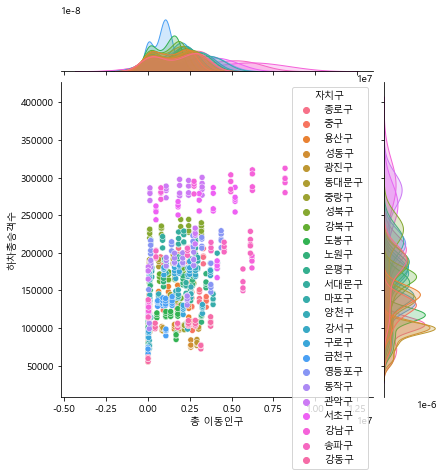

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

df_seoul_bus_station = pd.read_csv('df_seoul_bus_station_jong.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving_jong.csv', sep=",", encoding = 'UTF-8')
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on=['도착 시군구 코드', '요일'])

# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

target = '하차총승객수'
var = '총 이동인구'
sns.jointplot(x = var, y = target, data = df, hue = '자치구')

plt.show()

In [13]:
# 상관분석(가설검정) ~ 자치구별

for i in standard['도착 시군구 코드']:
    df_i = df[df['도착 시군구 코드'] == i]
    print(spst.pearsonr(df_i['하차총승객수'], df_i['총 이동인구']))
    


(0.28937117589728706, 0.12090165050563356)
(0.4484315685919722, 0.012941503621849869)
(0.38476918702314766, 0.03577150013333224)
(0.35632323196397786, 0.05327208196309679)
(0.3420468972183272, 0.06429739877471324)
(0.30323481231198385, 0.103328558539918)
(0.26614255793291697, 0.1551510949539463)
(0.2880489242237058, 0.1226864194451334)
(0.3562158198468631, 0.05334905639785926)
(0.2884430279365008, 0.12215243780485181)
(0.2564507549208963, 0.17132511019188695)
(0.3413785967759247, 0.06485405801731332)
(0.3497572698075145, 0.058141088591454)
(0.3166992082578861, 0.08816964032309381)
(0.2685589577384741, 0.15129523095877911)
(0.3739522796190152, 0.041778572403742144)
(0.3324298721840731, 0.07267549750552041)
(0.39984251080849514, 0.028581442246010128)
(0.3406723647708699, 0.0654463879958125)
(0.3200695721933683, 0.08465492816663008)
(0.348186522748025, 0.059356115525809404)
(0.40375593104561447, 0.02692125865143027)
(0.419742760167054, 0.020935365247529713)
(0.3942597941043359, 0.03109306

# STEP 2 : 버스에서 내리는 유입인구 -- 버스 현황 (상관관계 없..)

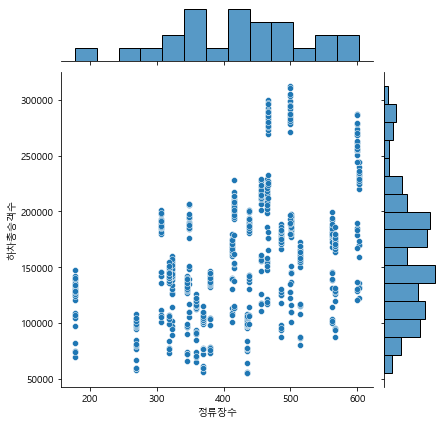

In [12]:
var = '정류장수'
sns.jointplot(x = var, y = target, data = df)

plt.show()

In [7]:
print(spst.pearsonr(df['정류장수'], df['하차총승객수']))
print(spst.pearsonr(df['정류장수'], df['총 이동인구']))
print(spst.pearsonr(df['노선수'], df['하차총승객수']))
print(spst.pearsonr(df['노선수'], df['총 이동인구']))

(0.4762917437910825, 9.882393094086411e-44)
(0.18212463980223909, 5.128987890561194e-07)
(0.5373541957233882, 2.452494613951806e-57)
(0.09404721854513678, 0.009965994820507078)


In [14]:
df_off = df.groupby(by=['도착 시군구 코드', '자치구'], as_index=False)[['하차총승객수', '정류장수', '노선수']].mean()

a = []
for i in standard['도착 시군구 코드']:
    df_i = df[df['도착 시군구 코드'] == i]
    a.append(spst.pearsonr(df_i['하차총승객수'], df_i['총 이동인구']))
    
df_a = pd.DataFrame(a)
b = pd.concat([df_off, df_a], axis = 1)

#상관관계 중간이상 + p-value 0.05이하
candidate = b[(b[0]>0.3)&(b[1]<0.05)]
candidate

,도착 시군구 코드,자치구,하차총승객수,정류장수,노선수,0,1
1,11020,중구,119964.400000,178.0,103.0,0.448432,0.012942
2,11030,용산구,136215.800000,323.0,67.0,0.384769,0.035772
15,11160,강서구,155094.266667,566.0,49.0,0.373952,0.041779
17,11180,금천구,119397.666667,345.0,58.0,0.399843,0.028581
21,11220,서초구,232598.333333,600.0,93.0,0.403756,0.026921
22,11230,강남구,252307.100000,499.0,91.0,0.419743,0.020935
23,11240,송파구,186782.933333,415.0,55.0,0.394260,0.031093
24,11250,강동구,94350.200000,369.0,21.0,0.423188,0.019801


In [10]:
candidate['지표'] =( candidate['정류장수']*candidate['노선수'])/candidate['하차총승객수']
candidate.sort_values(['지표'], ascending=[False])

<ipython-input-10-c907320ce85a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate['지표'] =( candidate['정류장수']*candidate['노선수'])/candidate['하차총승객수']


,도착 시군구 코드,자치구,하차총승객수,정류장수,노선수,0,1,지표
21,11220,서초구,232598.333333,600.0,93.0,0.403756,0.026921,0.239899
22,11230,강남구,252307.100000,499.0,91.0,0.419743,0.020935,0.179975
15,11160,강서구,155094.266667,566.0,49.0,0.373952,0.041779,0.178820
17,11180,금천구,119397.666667,345.0,58.0,0.399843,0.028581,0.167591
2,11030,용산구,136215.800000,323.0,67.0,0.384769,0.035772,0.158873
1,11020,중구,119964.400000,178.0,103.0,0.448432,0.012942,0.152829
23,11240,송파구,186782.933333,415.0,55.0,0.394260,0.031093,0.122201
24,11250,강동구,94350.200000,369.0,21.0,0.423188,0.019801,0.082130


In [15]:
# (상관관계 중간이상 + p-value 0.05이하)으로 버스수요가 있는 자치구 중 지표를 통해 강동구가 가장 정류장 추가설치가 필요함을 알 수 있다.

### 3)

## 4.관계 정리

### 1) 강한 관계의 변수

* 

### 2) 약한 관계의 변수

*

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?